## Parcial III: Emisiones de CO2

#### Cristian Serna
#### Laura Sofía Arango

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from matplotlib.cbook import boxplot_stats
import sklearn.linear_model as lm


### Punto 1:

In [37]:
# cargamos los datasets

# gases de efecto invernadero
emisiones=pd.read_csv('Datasets/Emisiones de gases de efecto invernadero totales/efecto_invernadero.csv')

# área selvática
area_selvatica=pd.read_csv('Datasets/╡rea selvática/area_selvatica.csv')

# crecimiento poblacional 
crecimiento_poblacional=pd.read_csv('Datasets/Crecimiento de la población Urbana/crecimiento_poblacional.csv')

### Punto 2:

In [38]:
# Visualizamos el dataset
emisiones

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,NaN,AFE,838050,948360,1342560,1381860,1406900,1436410,1436770,1457530,1471620,1478910,..,..
1,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,NaN,AFW,398170,553740,723970,740720,771100,790820,805370,835230,848650,881570,..,..
2,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,El mundo árabe,ARB,985720,1380740,2174340,2285760,2318020,2395260,2438650,2479110,2518170,2538650,..,..
3,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Estados pequeos del Caribe,CSS,44920,44910,56360,58520,57700,57020,56680,53830,53410,55020,..,..
4,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Europa Central y del Báltico,CEB,1280490,916490,902300,873260,845980,825390,837450,847240,870180,864510,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from Database: Indicadores del desarrollo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# De acuerdo con la previsualización del dataframe, los años 2019 y 2020 no tienen datos. Comprobemos qué datos únicos tienen:

emisiones.iloc[:266][['2019 [YR2019]', '2020 [YR2020]']].value_counts()

2019 [YR2019]  2020 [YR2020]
..             ..               266
dtype: int64

In [40]:
# Efectivamente, no hay datos para 2019 y 2020, por lo que omitimos estas columnas para nuestro análisis

# Las primeras 2 columnas solo indican el nombre y código de la serie (el cual siempre es el mismo), por lo tanto lo omitimos para facilitar la visualización.
valid_columns = emisiones.keys()[0:-2]

emisiones = emisiones.iloc[:266][valid_columns]

De una exporación básica del notebook se encontró que las colummnas 2019 [YR2019] y 2012 [YR2020] no poseían datos entonces fueron eliminadas. También se encontró que de la fila 266 en adelante estaban vacías entonces también se cortaron.

### Punto 3:

In [41]:
# Es de esperarse que no haya datos para todos los años de cada país.
# Eliminaremos los paises que no tengan datos para más de 2 años.

# Pero antes reemplacemos los valores faltantes representados por '..' por NaN.
emisiones = emisiones.replace('..', np.nan)

# Tomamos solo las columnas con datos numéricos para verificar los Nan
values_columns = emisiones.keys()[4:]

emisiones = emisiones[emisiones[values_columns].isnull().sum(axis=1) < 3]

emisiones[values_columns] = emisiones[values_columns].astype('float64')

Se reemplazan los strings  '..'  por el Nan para posteriormente elimninar las filas que tiene más de tres datos faltantes.

In [42]:
# Vemos que en el dataset se incluyen distintas regiones geopolíticas: mundo entero, continentes, grupos de países, organizaciones, países, etc.
# Debemos de separar manualmente los datos de cada una de las regiones.

# Veamos la lista entera de regiones y países

emisiones['Country Name'].unique()

array([nan, 'El mundo árabe', 'Estados pequeos del Caribe',
       'Europa Central y del Báltico',
       'inicial del dividendo demográfico', 'Asia oriental y el Pacífico',
       'Asia oriental y el Pacífico (excluido altos ingresos)',
       'Asia oriental y el Pacífico (BIRF y la AIF)', 'Zona del Euro',
       'Europa y Asia central',
       'Europa y Asia central (excluido altos ingresos)',
       'Europa y Asia central (BIRF y la AIF)', 'Unión Europea',
       'Frágiles y situaciones de conflicto afectados',
       'Países pobres muy endeudados (PPME)', 'Ingreso alto', 'Sólo BIRF',
       'BIRF y la AIF', 'mezcla de la AIF', 'Sólo AIF', 'total de la AIF',
       'avanzada del dividendo demográfico', 'América Latina y el Caribe',
       'América Latina y el Caribe (excluido altos ingresos)',
       'América Latina y el Caribe (BIRF y la AIF)',
       'Países menos desarrollados: clasificación de las Naciones Unidas',
       'Ingreso mediano y bajo', 'Países de ingreso bajo',
     

In [43]:
# Dividimos el dataset en uno de país y otro de regiones
# Afganistán es el primer país de la lista

pos_afganistan = emisiones[emisiones['Country Name']=='Afganistán'].index[0]

emision_region = emisiones.iloc[:pos_afganistan-2]
emision_pais = emisiones.iloc[pos_afganistan-1:]

emision_pais.reset_index(drop=True, inplace=True)

# Reemplazamos los valores faltantes por la media de los datos de ese año

#emision_pais[values_columns] = emision_pais[values_columns].fillna(emision_pais[values_columns].mean(axis=1))

#emision_pais.iloc[108:115]

for i in emision_pais[emision_pais['1990 [YR1990]'].isnull()].index:
    emision_pais.iloc[i,4] = emision_pais.iloc[i,5]

Finalmente para que los datos sean más representativos se divide el dataset entre paices y las otras clasificaciones existentes (como regiones y nivel de ingresos), para posteriormente reemplazar Nan por la media de los datos del año en que faltaba.

### Punto 4

30.0 235510.0


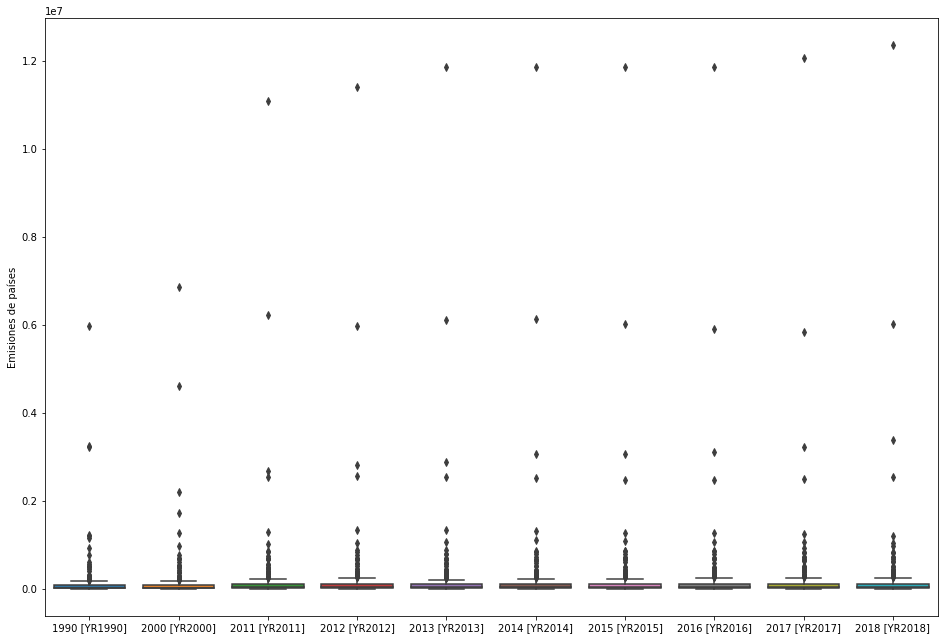

In [44]:
# se realiza el boxplot para todos los países
plt.figure(figsize=(16,11))
plt.ylabel('Emisiones de países')
box_plot = sns.boxplot(data=emision_pais, orient= 'v')

# se calculan los valores máximos y mínimos para los valores no atípicos del año 2018
low_whisker = boxplot_stats(emision_pais['2018 [YR2018]'])[0]['whislo']
high_whisker = boxplot_stats(emision_pais['2018 [YR2018]'])[0]['whishi']

print(low_whisker, high_whisker)

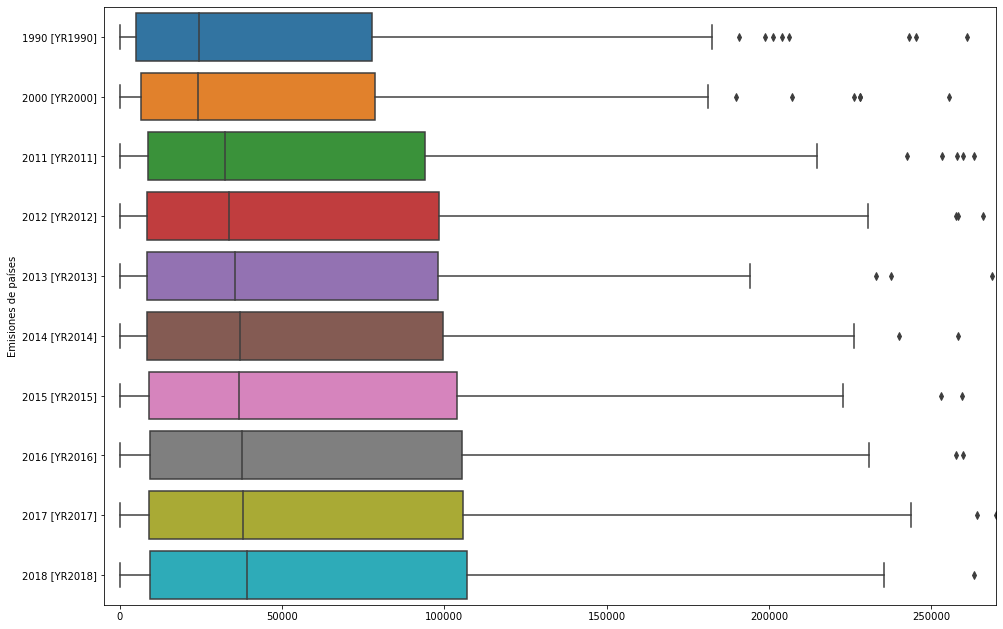

In [45]:
# La cota inferior para valores atípicos corresponde con el valor mínimo minimo del dataset, entonces solo excluimos con el bigote superior.
emision_pais_filtrado = emision_pais[emision_pais['2018 [YR2018]'] < high_whisker]

# Redifinimos los índices en el nuevo dataframe para poder ubicar de acuerdo a estos
emision_pais_filtrado.reset_index(drop=True, inplace=True)

# Veamos el gráfico más de cerca excluyendo la mayoría de los datos atípicos.

plt.figure(figsize=(16,11))
plt.ylabel('Emisiones de países')
plt.xlim(-5000, 270000)
box_plot = sns.boxplot(data=emision_pais, orient= 'h')

### Punto 5:

In [46]:
# calculamos la media de emisiones por año 
emision_pais_filtrado[values_columns].mean()

1990 [YR1990]    31545.660377
2000 [YR2000]    32693.836478
2011 [YR2011]    39246.289308
2012 [YR2012]    39955.031447
2013 [YR2013]    40226.477987
2014 [YR2014]    40590.691824
2015 [YR2015]    41218.238994
2016 [YR2016]    41906.855346
2017 [YR2017]    42332.389937
2018 [YR2018]    42662.264151
dtype: float64

In [54]:
# Ahora se procede a calcular la diferencia entre las emisiones en Colombia entre el año 2000 y 2018

emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia']


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
31,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Colombia,COL,124290.0,139710.0,166910.0,165340.0,172010.0,175230.0,176980.0,180940.0,177470.0,184100.0


In [47]:
# Ahora que vimos en que posición se encuentra Colombia procedamos a calcular la diferencia entre las emisiones

e_2000=emision_pais_filtrado['2000 [YR2000]'][emision_pais_filtrado['Country Name']=='Colombia'].values[0]
e_2018=emision_pais_filtrado['2018 [YR2018]'][emision_pais_filtrado['Country Name']=='Colombia'].values[0]

print(f'La diferencia de las emisiones en Colombia entre los años 2000 y 2018 es de {(e_2018-e_2000)}, es decir, las emisiones aumentaron en un {np.round(100*(e_2018-e_2000)/e_2000,2)}% ')

La diferencia de las emisiones en Colombia entre los años 2000 y 2018 es de 44390.0, es decir, las emisiones aumentaron en un 31.77% 


### Punto 6:

In [48]:
# Encontramos los 10 países con mayores emisiones y los 10 países con menos emisiones
min_emision = emision_pais_filtrado.iloc[emision_pais_filtrado[values_columns].mean(axis=1).sort_values(ascending=True).index[0:10]]
max_emision = emision_pais_filtrado.iloc[emision_pais_filtrado[values_columns].mean(axis=1).sort_values(ascending=False).index[0:10]]

# Sacamos las emisiones de Colombia para todos los años
emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia'][values_columns].values[0]

array([124290., 139710., 166910., 165340., 172010., 175230., 176980.,
       180940., 177470., 184100.])

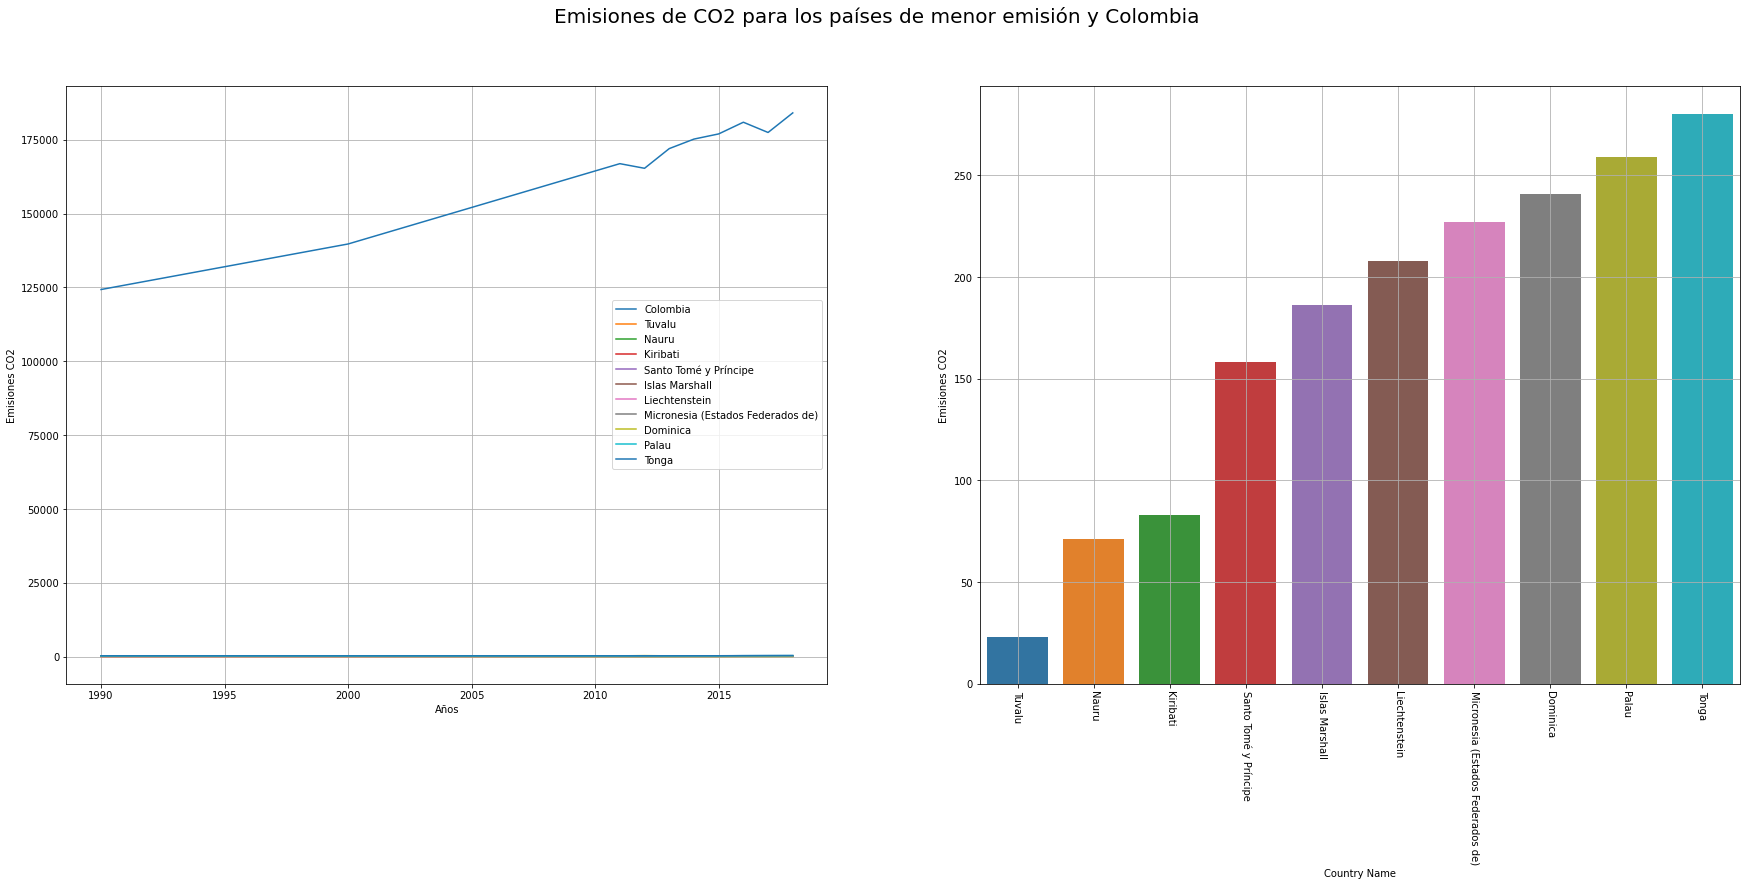

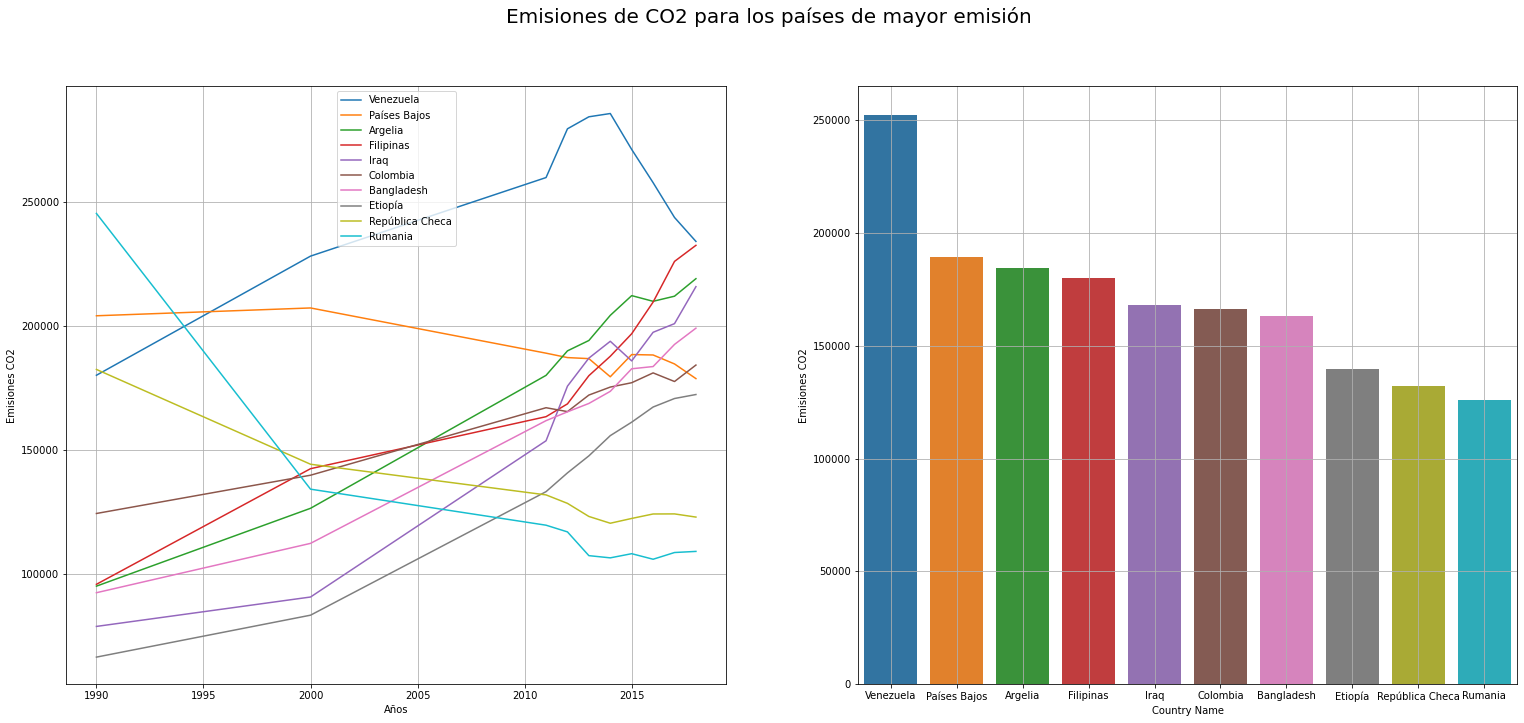

In [49]:
yrs = [1990, 2000, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# Gráfica de mínimas emisiones
fig, axs = plt.subplots(1, 2, figsize=(30,11))

fig.suptitle('Emisiones de CO2 para los países de menor emisión y Colombia', fontsize=20)

# Evolución temporal
axs[0].plot(np.array(yrs), emision_pais_filtrado[emision_pais_filtrado['Country Name']=='Colombia'][values_columns].values[0], label='Colombia')

for i in min_emision['Country Name']:
    axs[0].plot(yrs, min_emision[min_emision['Country Name'] == i][values_columns].values[0],label = i)

# Gráfico de barras sin Colombia


axs[0].set_xlabel('Años')
axs[0].set_ylabel('Emisiones CO2')
sns.barplot(x=min_emision['Country Name'], y=min_emision[values_columns].mean(axis=1))

plt.xticks(rotation=-90)

plt.ylabel('Emisiones CO2')
# Activa el Legend y el Grid
axs[0].legend()
for i in axs:
    i.grid()


# Gráfica de máximas emisiones
fig, axs = plt.subplots(1, 2, figsize=(26,11))

fig.suptitle('Emisiones de CO2 para los países de mayor emisión', fontsize=20)

for i in max_emision['Country Name']:
    axs[0].plot(yrs, max_emision[max_emision['Country Name'] == i][values_columns].values[0],label = i)


axs[0].set_xlabel('Años')
axs[0].set_ylabel('Emisiones CO2')
axs[0].legend()
sns.barplot(x=max_emision['Country Name'], y=max_emision[values_columns].mean(axis=1))

plt.ylabel('Emisiones CO2')
for i in axs:
    i.grid()

Anotación: Se excluye a Colombia del gráfico de barras de los países con menores emisiones pues este es mucho mayor que todos ellos y no deja que se aprecie el comportamiento de los otros. También se tiene que la mayores y menores emisiones son una media de todos los años y no se está teniendo en cuenta los países de mayores emisiones que se eliminaron por ser datos atípicos.

### Punto 7:

In [80]:
# Realizamos una regresión lineal para predecir como se van a comportar las emisiones en 50 años
regression = lm.LinearRegression()
regression.fit(X = pd.DataFrame(yrs), y = emision_pais[emision_pais['Country Name']=='Colombia'][values_columns].T)

#print(regression.coef_, regression.intercept_)

print(f'Las emisiones de Colombia serán de {np.round(regression.predict(X = pd.DataFrame([2070]))[0][0],2)} en el año 2070, esto es un aumento del {np.round(100*(regression.predict(X = pd.DataFrame([2070]))[0][0]-e_2018)/e_2018,2)}% respecto a 2018')

Las emisiones de Colombia serán de 295163.26 en el año 2070, esto es un aumento del 60.33% respecto a 2018


In [81]:
regression_world= lm.LinearRegression()
regression_world.fit(X = pd.DataFrame(yrs), y = emisiones[emisiones['Country Name']=='Mundo'][values_columns].T)

m_2018=emisiones['2018 [YR2018]'][emisiones['Country Name']=='Mundo'].values[0]

#print(regression_world.coef_, regression_world.intercept_)

print(f'Las emisiones a nivel mundial serán de {np.round(regression_world.predict(X = pd.DataFrame([2070]))[0][0],2)} en el año 2070, esto es un aumento del {np.round(100*(regression_world.predict(X = pd.DataFrame([2070]))[0][0]-m_2018)/m_2018,2)}% respecto a 2018')

Las emisiones a nivel mundial serán de 78879251.82 en el año 2070, esto es un aumento del 71.95% respecto a 2018


### Punto 8:

In [52]:
emision_pais[emision_pais['Country Name']=='Colombia'][values_columns].values[0]

array([124290., 139710., 166910., 165340., 172010., 175230., 176980.,
       180940., 177470., 184100.])

In [55]:
# Ampliemos el dataset filtrado utilizando los datasets de área selvática y crecimiento poblacional. Elegimos solo los países que habíamos seleccionado en el dataset de emisiones.

selvatica_pais = area_selvatica[area_selvatica['Country Name'].isin(emision_pais['Country Name'])][valid_columns]

# Reemplazamos los valores faltantes en los datasets por el valor de la media del año correspondiente
selvatica_pais = selvatica_pais.replace('..', np.nan)


selvatica_pais[values_columns] = selvatica_pais[values_columns].astype('float64')

# ADVERTENCIA: Esta sustitución con el valor de la media está sujeta a verificación. Aún no se ha hecho un análisis de valores atípicos.
selvatica_pais[values_columns] = selvatica_pais[values_columns].fillna(selvatica_pais[values_columns].mean())


selvatica_region = area_selvatica[area_selvatica['Country Name'].isin(emision_region['Country Name'])][valid_columns].dropna()
emision_region = emision_region.dropna()

In [56]:
# Ampliemos el dataset filtrado utilizando los datasets de área selvática y crecimiento poblacional. Elegimos solo los países que habíamos seleccionado en el dataset de emisiones.

selvatica_pais = area_selvatica[area_selvatica['Country Name'].isin(emision_pais['Country Name'])][valid_columns]
poblacion_pais = crecimiento_poblacional[crecimiento_poblacional['Country Name'].isin(emision_pais['Country Name'])][valid_columns]

emision_region = emision_region.dropna()
selvatica_region = area_selvatica[area_selvatica['Country Name'].isin(emision_region['Country Name'])][valid_columns].dropna()
poblacion_region = crecimiento_poblacional[area_selvatica['Country Name'].isin(emision_region['Country Name'])][valid_columns].dropna()

# Reemplazamos los valores faltantes en los datasets por el valor de la media del año correspondiente
selvatica_pais = selvatica_pais.replace('..', np.nan)
poblacion_pais = poblacion_pais.replace('..', np.nan)


selvatica_pais[values_columns] = selvatica_pais[values_columns].astype('float64')
poblacion_pais[values_columns] = poblacion_pais[values_columns].astype('float64')

poblacion_pais = poblacion_pais[poblacion_pais[values_columns].isnull().sum(axis=1) < 3]
selvatica_pais = selvatica_pais[selvatica_pais[values_columns].isnull().sum(axis=1) < 3]

m = selvatica_pais[values_columns].mean(axis=1)
for i, col in enumerate(selvatica_pais):
    selvatica_pais.iloc[:, i] = selvatica_pais.iloc[:, i].fillna(m)


emision_region[values_columns] = emision_region[values_columns].astype('float64')
poblacion_region[values_columns] = poblacion_region[values_columns].astype('float64')
selvatica_region[values_columns] = selvatica_region[values_columns].astype('float64')

In [57]:
def correlation_elements(df1, df2):
    correlation = df1.corrwith(df2, axis = 0).values

    corr1990 = correlation[0]
    corr2000 = correlation[1]
    corr2010 = np.mean(correlation[2:])

    return corr1990, corr2000, corr2010

In [58]:
dataframes = [emision_pais, selvatica_pais, poblacion_pais]

matrices = [np.zeros((3,3)), np.zeros((3,3)), np.zeros((3,3))]

for i in range(3):
    for j in range(3):
        for k in range(3):
            matrices[i][j,k] = correlation_elements(dataframes[j], dataframes[k])[i]

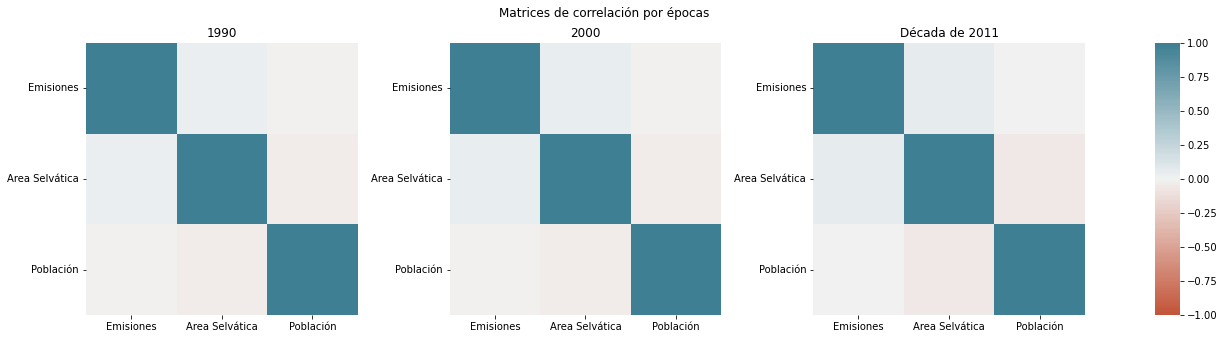

In [59]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, figsize=(20,5), gridspec_kw={'width_ratios':[1,1,1,0.08]})
f.suptitle("Matrices de correlación por épocas")

cmap=sns.diverging_palette(20, 220, n=200)

ticks = ['Emisiones', 'Area Selvática', 'Población']

g1 = sns.heatmap(matrices[0],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax1)
g1.set_title('1990')

g2 = sns.heatmap(matrices[1],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax2)
g2.set_title('2000')

g3 = sns.heatmap(matrices[2],cmap=cmap, vmin=-1, vmax=1, center=0, square = True, ax=ax3, cbar_ax=axcb)
g3.set_title('Década de 2011')

for ax in [g1,g2,g3]:
    ax.set_xticklabels(ticks, rotation=0)
    ax.set_yticklabels(ticks, rotation=0)

plt.show()


#### Punto 9:

In [60]:
# cargamos los datasets

# población total del mundo
poblacion_total=pd.read_csv('Datasets/Población total/Poblacion_total.csv',sep=',',skiprows=4)

# % de la energía total que representa la energía fósil
energia_fosil=pd.read_csv('Datasets/Energía fósil/Energia fosil.csv',sep=',',skiprows=4)

# % de la energía total que representa la energía renovable
energia_renovable=pd.read_csv('Datasets/Energía renovable/Energía renovable.csv',sep=',',skiprows=4)

# % de la energía total que representa la energía nuclear y alternativa
energia_nuclear=pd.read_csv('Datasets/Energia nuclear/Energia nuclear.csv',sep=',',skiprows=4)

# PIB en USD actuales
PIB = pd.read_csv('Datasets/PIB/PIB.csv', sep=',')

# PIB per capita
PIB_percapita= pd.read_csv('Datasets/PIB per cápita/pib_percapita.csv', sep=',')

# Crecimiento de la población urbana
poblacion_urbana=pd.read_csv('Datasets/Población urbana/poblacion_urbana.csv',sep=',',skiprows=4)

In [61]:
def new_key(st):
    try:
        int(st)
        new_st = str(st) + ' [YR{}]'.format(st)
    except:
        new_st = st
    return new_st

def red_keys(df):
    keys = df.keys().values
    values = []
    for i in keys:
        values.append(new_key(i))
    # print(keys, values)
    df = df.rename(columns = dict(zip(keys, values)))
    return df

# Function that moves 3 and 4 columns to the beginning of the dataframe
def move_columns_and_rename(df):
    cols = df.columns.tolist()
    cols = cols[2:4] + cols[:2] + cols[4:]

    df = df[cols]
    keys = df.keys().values
    values = keys.copy()
    values[0] = 'Series Name'
    values[1] = 'Series Code'

    df = df.rename(columns = dict(zip(keys, values)))
    return df

def clean_dataframe(df):
    # df = df[df['Country Name'].isin(emision_pais['Country Name'])][valid_columns]
    df = df[valid_columns]
    df = df[df[values_columns].isnull().sum(axis=1) < 3]

    df.reset_index(drop=True, inplace=True)

    # Una posible solución es calcular la media sin valores atípicos, pero seguir incluyendo estos valores en el análisis final
    #df[values_columns] = df[values_columns].fillna(df[values_columns].mean(axis=1),axis=1)

    df[values_columns] = df[values_columns].astype('float64')

    m = df[values_columns].mean(axis=1)
    for i, col in enumerate(df):
        df.iloc[:, i] = df.iloc[:, i].fillna(m)

    return df

def main_readapt_dataframe(df):
    df = red_keys(df)
    df = move_columns_and_rename(df)
    df = clean_dataframe(df)

    return df

In [62]:
poblacion_total = main_readapt_dataframe(poblacion_total.iloc[:,np.r_[0:4,34,44,55:63]])
energia_fosil = main_readapt_dataframe(energia_fosil.iloc[:,np.r_[0:4,34,44,55:63]])
energia_renovable = main_readapt_dataframe(energia_renovable.iloc[:,np.r_[0:4,34,44,55:63]])
energia_nuclear = main_readapt_dataframe(energia_nuclear.iloc[:,np.r_[0:4,34,44,55:63]])
poblacion_urbana = main_readapt_dataframe(poblacion_urbana.iloc[:,np.r_[0:4,34,44,55:63]])

# El dataset de PIB tiene un formato distinto, más similar al formato original

PIB = PIB.replace('..', np.nan)
PIB = clean_dataframe(PIB).dropna()

PIB_percapita=PIB_percapita.replace('..', np.nan)
PIB_percapita = clean_dataframe(PIB_percapita).dropna()

In [63]:
paises_comunes = pd.Series(list(set(emision_pais['Country Code']) &
                                set(poblacion_total['Country Code']) & 
                                set(energia_renovable['Country Code']) &
                                set(PIB['Country Code'])&
                                set(PIB_percapita['Country Code'])&
                                set(poblacion_urbana['Country Code'])))

In [64]:
poblacion_total = poblacion_total[poblacion_total['Country Code'].isin(paises_comunes)]
energia_renovable = energia_renovable[energia_renovable["Country Code"].isin(paises_comunes)]

emision_pais = emision_pais[emision_pais["Country Code"].isin(paises_comunes)]
selvatica_pais = selvatica_pais[selvatica_pais["Country Code"].isin(paises_comunes)]
poblacion_pais = poblacion_pais[poblacion_pais["Country Code"].isin(paises_comunes)]
PIB = PIB[PIB["Country Code"].isin(paises_comunes)]
PIB_percapita= PIB_percapita[PIB_percapita["Country Code"].isin(paises_comunes)]
poblacion_urbana = poblacion_urbana[poblacion_urbana["Country Code"].isin(paises_comunes)]

In [65]:
dataframes_ampliado = [emision_pais, selvatica_pais, poblacion_pais, poblacion_total, PIB_percapita,energia_renovable, PIB,poblacion_urbana]

n = len(dataframes_ampliado)
matrices_amp = [np.zeros((n,n)), np.zeros((n,n)), np.zeros((n,n))]

for i in range(3):
    for j in range(n):
        for k in range(n):
            matrices_amp[i][j,k] = correlation_elements(dataframes_ampliado[j], dataframes_ampliado[k])[i]

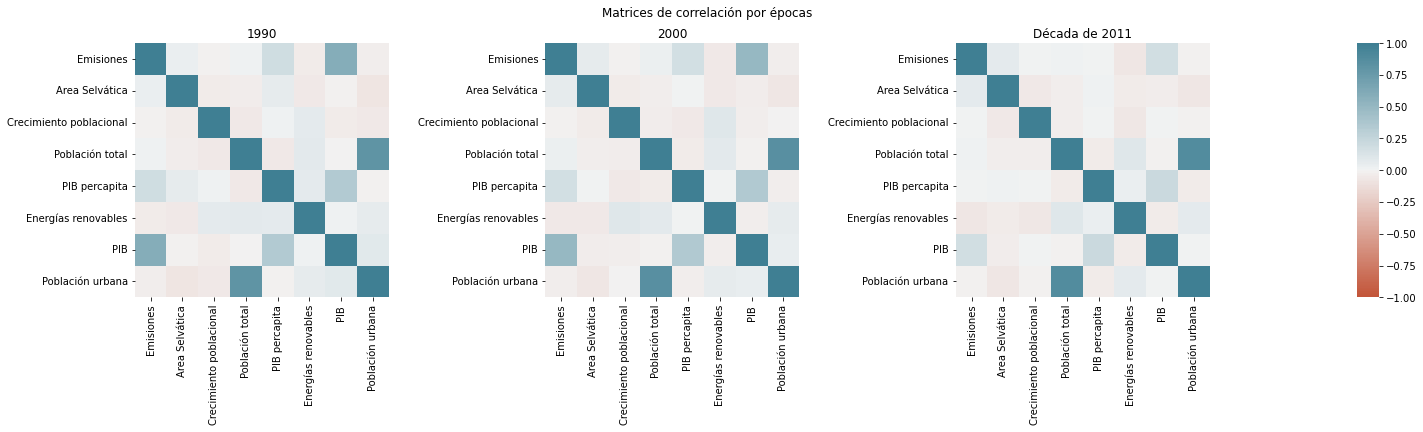

In [66]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, figsize=(20,6), gridspec_kw={'width_ratios':[1,1,1,0.08]})
f.suptitle("Matrices de correlación por épocas")

cmap=sns.diverging_palette(20, 220, n=200)

ticks = ['Emisiones', 'Area Selvática', 'Crecimiento poblacional', 'Población total',"PIB percapita", "Energías renovables", "PIB","Población urbana"]

g1 = sns.heatmap(matrices_amp[0],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax1)
g1.set_title('1990')

g2 = sns.heatmap(matrices_amp[1],cmap=cmap, vmin=-1, vmax=1, center=0, cbar=False, square = True, ax=ax2)
g2.set_title('2000')

g3 = sns.heatmap(matrices_amp[2],cmap=cmap, vmin=-1, vmax=1, center=0, square = True, ax=ax3, cbar_ax=axcb)
g3.set_title('Década de 2011')

for ax in [g1,g2,g3]:
    ax.set_xticklabels(ticks, rotation=90)
    ax.set_yticklabels(ticks, rotation=0)

plt.tight_layout()

plt.show()

In [67]:
matrices_amp

[array([[ 1.        ,  0.0334251 , -0.01675348,  0.01600944,  0.18411155,
         -0.04377845,  0.59175476, -0.02894589],
        [ 0.0334251 ,  1.        , -0.0464488 , -0.03357475,  0.05450711,
         -0.05061976, -0.01790236, -0.07838478],
        [-0.01675348, -0.0464488 ,  1.        , -0.04840428,  0.01080861,
          0.06617827, -0.04543388, -0.04978287],
        [ 0.01600944, -0.03357475, -0.04840428,  1.        , -0.05668959,
          0.0722207 , -0.00402939,  0.81584701],
        [ 0.18411155,  0.05450711,  0.01080861, -0.05668959,  1.        ,
          0.06346857,  0.34779873, -0.01487331],
        [-0.04377845, -0.05061976,  0.06617827,  0.0722207 ,  0.06346857,
          1.        ,  0.01325145,  0.05306918],
        [ 0.59175476, -0.01790236, -0.04543388, -0.00402939,  0.34779873,
          0.01325145,  1.        ,  0.08111423],
        [-0.02894589, -0.07838478, -0.04978287,  0.81584701, -0.01487331,
          0.05306918,  0.08111423,  1.        ]]),
 array([[ 1.  